In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df1 = pd.read_csv("house_Data.csv")
df1.head(2)


,ID,locality,zipcode,Building condition,Price,Kitchen type,Living area,Furnished,Surface of the plot,Number of frontages,Swimming pool,Bedrooms,Garden,Garden surface,Terrace,Terrace surface,Type of property
0,10318725,evere,1140,Good,499000,USA hyper equipped,155 m² square meters,FALSE,177 m² square meters,2,FALSE,3,FALSE,0,TRUE,27 m² square meters,House
1,10319750,waterloo,1410,Good,620000,Hyper equipped,155 m² square meters,FALSE,532 m² square meters,4,FALSE,3,TRUE,210 m² square meters,TRUE,40 m² square meters,House


Step 1 : Data Cleaning

In [6]:
# No duplicates
df1.drop_duplicates()
#detleted 'square meters' from Living area, Surface of the plot, Garden surface. Terrace surface.
df1['Living area'] = df1['Living area'].str.replace('m² square meters', '')
df1['Surface of the plot'] = df1['Surface of the plot'].str.replace('m² square meters', '')
df1['Garden surface'] = df1['Garden surface'].str.replace('m² square meters', '')
df1['Terrace surface'] = df1['Terrace surface'].str.replace('m² square meters', '')
df1['Living area'] = df1['Living area'].str.replace('m² square meter', '')
df1['Surface of the plot'] = df1['Surface of the plot'].str.replace('m² square meter', '')
df1['Garden surface'] = df1['Garden surface'].str.replace('m² square meter', '')
df1['Terrace surface'] = df1['Terrace surface'].str.replace('m² square meter', '')
df1['Furnished'] = df1['Furnished'].astype('bool')
df1['Swimming pool'] = df1['Swimming pool'].astype('bool')
df1['Terrace'] = df1['Terrace'].astype('bool')

df1.head()
df = df1

In [7]:

df['Living area'] = pd.to_numeric(df['Living area'])

df['Number of frontages'] = pd.to_numeric(df['Number of frontages'])
df['Garden surface'] = pd.to_numeric(df['Garden surface'])
df['Terrace surface'] = pd.to_numeric(df['Terrace surface'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3417 entries, 0 to 3416
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   3417 non-null   int64 
 1   locality             3417 non-null   object
 2   zipcode              3417 non-null   int64 
 3   Building condition   2966 non-null   object
 4   Price                3417 non-null   int64 
 5   Kitchen type         3417 non-null   object
 6   Living area          3417 non-null   int64 
 7   Furnished            3417 non-null   bool  
 8   Surface of the plot  3417 non-null   object
 9   Number of frontages  3417 non-null   int64 
 10  Swimming pool        3417 non-null   bool  
 11  Bedrooms             3417 non-null   int64 
 12  Garden               3417 non-null   object
 13  Garden surface       3417 non-null   int64 
 14  Terrace              3417 non-null   bool  
 15  Terrace surface      3417 non-null   int64 
 16  Type o

In [8]:
from skimpy import clean_columns
df = clean_columns(df1)
df

15 column names have been cleaned

,id,locality,zipcode,building_condition,price,kitchen_type,living_area,furnished,surface_of_the_plot,number_of_frontages,swimming_pool,bedrooms,garden,garden_surface,terrace,terrace_surface,type_of_property
0,10318725,evere,1140,Good,499000,USA hyper equipped,155,True,177,2,True,3,FALSE,0,True,27,House
1,10319750,waterloo,1410,Good,620000,Hyper equipped,155,True,532,4,True,3,TRUE,210,True,40,House
2,10319842,waterloo,1410,Good,645000,Installed,190,True,944,4,True,4,TRUE,450,True,25,House
3,10320082,herselt,2230,Good,720000,Installed,320,True,5209,4,True,4,FALSE,0,True,0,House
4,10320081,herselt,2230,Good,720000,Installed,320,True,5209,4,True,4,FALSE,0,True,0,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,10334348,gent,9000,NaN,360000,Semi equipped,97,True,694,2,True,1,None,0,True,0,House
3413,10334345,ougree,4102,NaN,67000,None,92,True,100,0,True,2,None,0,True,0,House
3414,10334341,ans,4430,Good,174900,Semi equipped,73,True,0,2,True,2,None,0,True,3,Apartment
3415,10334340,nechin,7730,Good,209000,Installed,130,True,205,2,True,3,None,0,True,40,House


In [9]:
df.shape

(3417, 17)

In [10]:
df.dtypes

id                      int64
locality               object
zipcode                 int64
building_condition     object
price                   int64
kitchen_type           object
living_area             int64
furnished                bool
surface_of_the_plot    object
number_of_frontages     int64
swimming_pool            bool
bedrooms                int64
garden                 object
garden_surface          int64
terrace                  bool
terrace_surface         int64
type_of_property       object
dtype: object

Step 2 : Data Analysis

In [11]:
df.shape

(3417, 17)

In [12]:
df.corr()

C:\Users\sheet\AppData\Local\Temp\ipykernel_106672\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,zipcode,price,living_area,furnished,number_of_frontages,swimming_pool,bedrooms,garden_surface,terrace,terrace_surface
id,1.000000,0.049774,-0.032685,0.010570,NaN,0.027154,NaN,0.011788,-0.001296,NaN,0.009570
zipcode,0.049774,1.000000,-0.126891,-0.030755,NaN,-0.119971,NaN,-0.109304,-0.033883,NaN,-0.106735
price,-0.032685,-0.126891,1.000000,0.612527,NaN,0.264176,NaN,0.420970,0.121107,NaN,0.158170
living_area,0.010570,-0.030755,0.612527,1.000000,NaN,0.322582,NaN,0.685908,0.174140,NaN,0.168607
furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_frontages,0.027154,-0.119971,0.264176,0.322582,NaN,1.000000,NaN,0.350691,0.182982,NaN,0.187754
swimming_pool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.011788,-0.109304,0.420970,0.685908,NaN,0.350691,NaN,1.000000,0.168876,NaN,0.166425
garden_surface,-0.001296,-0.033883,0.121107,0.174140,NaN,0.182982,NaN,0.168876,1.000000,NaN,0.215789
terrace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


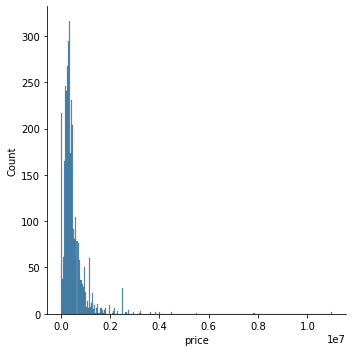

In [13]:
sns.displot(df['price'])


Step 2 : Data Analysis

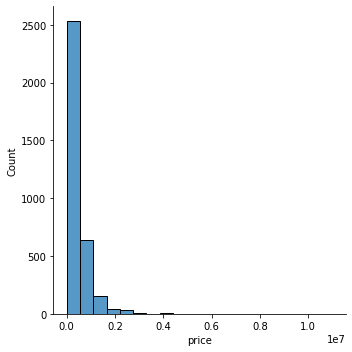

In [14]:
sns.displot(df['price'], bins=20)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Question1: How many rows and columns?

In [16]:
print("number of row : ", df.shape[0])
print("number of columns1 : ", df.shape[1])



number of row :  3417
number of columns1 :  17


Question 2: What is the correlation between the variables and the price? (Why might that be?)

In [17]:
print('hello')

hello


In [18]:
#Remove  column name ID


In [19]:
df.corr().round(2)

C:\Users\sheet\AppData\Local\Temp\ipykernel_106672\1524431984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2)


,id,zipcode,price,living_area,furnished,number_of_frontages,swimming_pool,bedrooms,garden_surface,terrace,terrace_surface
id,1.00,0.05,-0.03,0.01,NaN,0.03,NaN,0.01,-0.00,NaN,0.01
zipcode,0.05,1.00,-0.13,-0.03,NaN,-0.12,NaN,-0.11,-0.03,NaN,-0.11
price,-0.03,-0.13,1.00,0.61,NaN,0.26,NaN,0.42,0.12,NaN,0.16
living_area,0.01,-0.03,0.61,1.00,NaN,0.32,NaN,0.69,0.17,NaN,0.17
furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_frontages,0.03,-0.12,0.26,0.32,NaN,1.00,NaN,0.35,0.18,NaN,0.19
swimming_pool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.01,-0.11,0.42,0.69,NaN,0.35,NaN,1.00,0.17,NaN,0.17
garden_surface,-0.00,-0.03,0.12,0.17,NaN,0.18,NaN,0.17,1.00,NaN,0.22
terrace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.describe()

,id,zipcode,price,living_area,number_of_frontages,bedrooms,garden_surface,terrace_surface
count,3.417000e+03,3417.000000,3.417000e+03,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000
mean,1.022313e+07,4557.676032,4.826238e+05,201.381914,2.466491,3.412350,220.700907,13.482587
std,2.076685e+05,3015.331988,5.355981e+05,140.235444,1.306444,1.942228,1044.143827,26.658913
min,5.750433e+06,1000.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.019403e+07,1702.000000,2.400000e+05,120.000000,2.000000,2.000000,0.000000,0.000000
50%,1.028989e+07,4052.000000,3.590000e+05,171.000000,2.000000,3.000000,0.000000,0.000000
75%,1.032574e+07,7711.000000,5.600000e+05,250.000000,4.000000,4.000000,122.000000,20.000000
max,1.033436e+07,9991.000000,1.100000e+07,1500.000000,4.000000,39.000000,42500.000000,396.000000


Step 3 : Data Interpretation

In [21]:
print("number of NaN values for the column SurfaceArea_land :", df['Surface of the land'].isnull().sum())
print("number of NaN values for the column SurfaceArea_Plot :", df['Surface area of the plot of land'].isnull().sum())

KeyError: 'Surface of the land'

In [ ]:
df.groupby(['price'])

NameError: name 'df' is not defined

In [ ]:

obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

In [ ]:

unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('Price prediction')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

In [ ]:

plt.figure(figsize=(25, 45))
plt.title('Categorical Features')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(9, 4, index)
    plt.xticks(rotation=90)
    sns.histplot(x=list(y.index), y=y)
    index += 1